In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import string
import seaborn as sns

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv("ld.csv")

In [4]:
dataset

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [5]:
dataset['Language'].unique()

array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'], dtype=object)

In [6]:
dataset.shape

(10337, 2)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [8]:
dataset.Language.value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [9]:
dataset[dataset.Language == 'Hindi'].sample(5)

,Text,Language
2006,और आपको वह नहीं मिला जो दूसरा व्यक्ति कह रहा थ...,Hindi
1985,"यह परियोजना के बारे में बार बार, अक्सर अन्य वे...",Hindi
2005,अगर आप किसी से पूछते हैं कि आप रोने के लिए परे...,Hindi
2031,क्या आप इस सप्ताह के अंत में कुछ करना चाहते हैं?,Hindi
2026,आगे बढ़ें। ज़रूर जाना। मुझे खत्म करते हैं। एक ...,Hindi


In [10]:
def removeSymbolsAndNumbers(text):        
        text = re.sub(r'[{}]'.format(string.punctuation), '', text)
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'[@]', '', text)

        return text.lower()

In [11]:
def removeEnglishLetters(text):        
        text = re.sub(r'[a-zA-Z]+', '', text)
        return text.lower()

In [12]:
X0 = dataset.apply(lambda x: removeEnglishLetters(x.Text) if x.Language in ['Russian','Malyalam','Hindi','Kannada','Tamil','Arabic']  else x.Text, axis = 1)
X0

0         Nature, in the broadest sense, is the natural...
1        "Nature" can refer to the phenomena of the phy...
2        The study of nature is a large, if not the onl...
3        Although humans are part of nature, human acti...
4        [1] The word nature is borrowed from the Old F...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Length: 10337, dtype: object

In [13]:
X1 = X0.apply(removeSymbolsAndNumbers)
X1

0         nature in the broadest sense is the natural p...
1        nature can refer to the phenomena of the physi...
2        the study of nature is a large if not the only...
3        although humans are part of nature human activ...
4         the word nature is borrowed from the old fren...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ  ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Length: 10337, dtype: object

In [14]:
y = dataset['Language']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X1,y, random_state=42)

In [16]:
vectorizer = TfidfVectorizer(ngram_range=(1,3), analyzer='char')

In [17]:
model = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', LogisticRegression())
])

In [18]:
model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_sc

In [19]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [20]:
print(accuracy)

0.9829787234042553


In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Arabic       1.00      0.99      1.00       134
      Danish       0.97      0.97      0.97        97
       Dutch       0.99      0.96      0.97       139
     English       0.96      0.99      0.98       364
      French       0.99      0.98      0.99       269
      German       0.99      0.97      0.98       116
       Greek       1.00      1.00      1.00        86
       Hindi       1.00      1.00      1.00        13
     Italian       0.98      0.96      0.97       180
     Kannada       1.00      1.00      1.00        78
   Malayalam       1.00      0.99      1.00       158
  Portugeese       0.98      0.98      0.98       170
     Russian       1.00      1.00      1.00       171
     Spanish       0.99      0.98      0.98       206
    Sweedish       0.98      0.96      0.97       162
       Tamil       1.00      1.00      1.00       114
     Turkish       0.95      0.99      0.97       128

    accuracy              

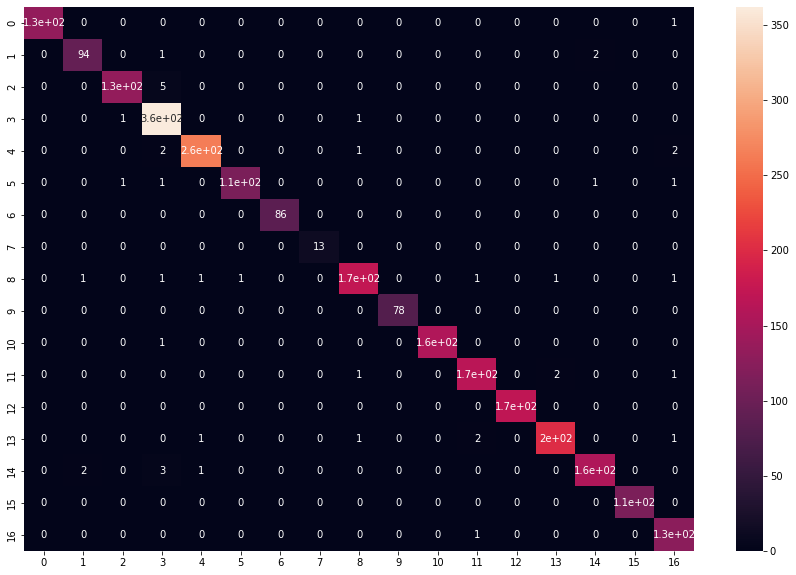

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [23]:
def predict(text):
    lang = model.predict([text])
    print('The Language is in',lang[0])

In [24]:
# English
predict("LANGUAGE DETECTION MODEL CHECK")
# French
predict("VÉRIFICATION DU MODÈLE DE DÉTECTION DE LA LANGUE")
# Arabic
predict("توففحص نموذج الكشف عن اللغة")
# Spanish
predict("VERIFICACIÓN DEL MODELO DE DETECCIÓN DE IDIOMAS")
# Malayalam
predict("ലാംഗ്വേജ് ഡിറ്റക്ഷൻ മോഡൽ ചെക്ക്")
# Russian
predict("ПРОВЕРКА МОДЕЛИ ОПРЕДЕЛЕНИЯ ЯЗЫКА")
# Hindi
predict('भाषा का पता लगाने वाले मॉडल की जांच')
# Hindi
predict(' boyit9h एनालिटिक्स alhgserog 90980879809 bguytfivb ahgseporiga प्रदान करता है')

The Language is in English
The Language is in French
The Language is in Arabic
The Language is in Spanish
The Language is in Malayalam
The Language is in Russian
The Language is in Hindi
The Language is in Hindi


In [25]:
predict('यह पाठ अंग्रेजी में लिखा गया है लेकिन इसे हिंदी में परिवर्तित किया जा रहा है')

The Language is in Hindi


In [26]:
predict('yah paath angrejee mein likha gaya hai lekin ise hindee mein parivartit kiya ja raha hai')

The Language is in English


In [27]:
predict("ik ben knap")

The Language is in Dutch


In [29]:
import pickle
with open("Language_Detection", "wb") as f:
  pickle.dump(model, f)

In [35]:
with open("Language_Detection", "rb") as f:
  mp = pickle.load(f)

input = ['यह पाठ अंग्रेजी में लिखा गया है लेकिन इसे हिंदी में परिवर्तित किया जा रहा है']
output = mp.predict(input)

print(output[0])

Hindi
